# **DA 5.1. PM4PY**
PM4PY : python 기반의 SW 

Colab 기반 -> Process Model을 도출하는 과정에서 Process를 Graph형태로 표현하는 경우가 많으므로 GraphViz module을 별도의 설치 없이 사용하기 위해서이다 

## Colab Path 설정

In [22]:
# Colab Path 설정
import os, sys
from google.colab import drive
drive.mount('/content/gdrive')

my_path = "gdrive/My Drive/Colab Notebooks/Data Analytics"
os.listdir(my_path)

#os.symlink('gdrive/My Drive/Colab Notebooks/Data Analytics', my_path)
#sys.path.insert(0, my_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


['example_log.csv', 'Week_5-1._PM4PY.ipynb']

In [21]:
!pip install --target=$path pm4py

     |████████████████████████████████| 1.5 MB 5.1 MB/s 
     |████████████████████████████████| 40.6 MB 68 kB/s 
  Created wheel for stringdist: filename=StringDist-1.0.9-cp37-cp37m-linux_x86_64.whl size=23592 sha256=891a8feb3ecb257cef623f7034ba47521e4c5d7b6024e30ac22e75155879b2a6
  Stored in directory: /root/.cache/pip/wheels/d7/9c/d4/63bc3d8931de0980b9e4a724dea290bb40b8b1b2bd6227c8da
Successfully built stringdist


## Importing CSV Files


P.M에서 사용하는 E.L는 csv, xex 파일 모두를 사용할 수 있다

In [64]:
  import pandas as pd
  import pm4py
  import numpy as np

In [65]:
df_example_log = pd.read_csv(my_path + "/example_log.csv",sep = ';')

In [66]:
# AS와 관련된 P.M
# 거기서 나타날 수 있는 E.L 
# additional Attribute -> coasts, resource 

df_example_log.head(10)

,case_id,activity,timestamp,costs,resource
0,3,register request,2010-12-30 14:32:00+01:00,50,Pete
1,3,examine casually,2010-12-30 15:06:00+01:00,400,Mike
2,3,check ticket,2010-12-30 16:34:00+01:00,100,Ellen
3,3,decide,2011-01-06 09:18:00+01:00,200,Sara
4,3,reinitiate request,2011-01-06 12:18:00+01:00,200,Sara
5,3,examine thoroughly,2011-01-06 13:06:00+01:00,400,Sean
6,3,check ticket,2011-01-08 11:43:00+01:00,100,Pete
7,3,decide,2011-01-09 09:55:00+01:00,200,Sara
8,3,pay compensation,2011-01-15 10:45:00+01:00,200,Ellen
9,2,register request,2010-12-30 11:32:00+01:00,50,Mike


현재는 tablo 형태의 data이지만 PM4PY에 이용하기 위해서 E.L형태의 data로 바꿔줘야할 필요가 있다 

즉 case_id, activity name, timestamp와 같은 내용을 mapping해준다고 생각하면 된다

In [67]:
# format_dataframe() 
# parameter -> timestamp_ket, timest_format(timestamp data format 지정, 년/월/일/시/분/초)

event_log_pm4py = pm4py.format_dataframe(df_example_log, case_id='case_id', activity_key='activity',
                                         timestamp_key='timestamp', timest_format='%Y-%m-%d %H:%M:%S%z')

In [68]:
# column name 변경됨
# case 와 taimestamp를 통해서 정렬됨 

event_log_pm4py.head(10)

,case:concept:name,concept:name,time:timestamp,costs,resource,@@index
14,1,register request,2010-12-30 10:02:00+00:00,50,Pete,14
15,1,examine thoroughly,2010-12-31 09:06:00+00:00,400,Sue,15
16,1,check ticket,2011-01-05 14:12:00+00:00,100,Mike,16
17,1,decide,2011-01-06 10:18:00+00:00,200,Sara,17
18,1,reject request,2011-01-07 13:24:00+00:00,200,Pete,18
9,2,register request,2010-12-30 10:32:00+00:00,50,Mike,9
10,2,check ticket,2010-12-30 11:12:00+00:00,100,Mike,10
11,2,examine casually,2010-12-30 13:16:00+00:00,400,Sean,11
12,2,decide,2011-01-05 10:22:00+00:00,200,Sara,12
13,2,pay compensation,2011-01-08 11:05:00+00:00,200,Ellen,13


E.L data 정보 살펴보기 

In [69]:
# num of events, num of cases, start and end activities, average of case durations
# get_end_activities : 각 작업별로(case) 마지막 작업(activity)이 무엇인지 출력 
# get_all_case_durations : 각 작업별로(case) 총 걸린 시간, sec 단위 -> day 단위로 출력하기 위해 24/60/60으로 나눗셈, 보기 좋게 round(2)

def basic_data_analysis(event_log):
    num_events = len(event_log)
    num_cases = len(event_log['case:concept:name'].unique())
    start_activities = pm4py.get_start_activities(event_log)
    end_activities = pm4py.get_end_activities(event_log)
    mean_case_durations = np.round(np.mean(pm4py.stats.get_all_case_durations(event_log))/24/60/60, 2)
    print("Number of events: {}\nNumber of cases: {}\nStart activities: {}\nEnd activities: {}\nMean of case durations: {}".format(num_events, num_cases, start_activities, end_activities, mean_case_durations))

In [70]:
# 평균 11일 정도 소요된다 

basic_data_analysis(event_log_pm4py)

Number of events: 42
Number of cases: 6
Start activities: {'register request': 6}
End activities: {'reject request': 3, 'pay compensation': 3}
Mean of case durations: 11.19


## Filtering Event Data

다양한 P.M을 도출하기 전 Event Data를 filtering 하는 방법에 대해서... 

filtering에는 다양한 경우가 존재함 

In [39]:
# filter_start_activites : ~ 작업으로 시작하는 case를 보겠다 -> 모든 case가 같은 start activity이므로 전체 결과를 포함하기 때문에 위의 결과와 다르지 않음 
# filter_end_activites : ~ 작업으로 끝나는 case를 보겠다 

filtered_event_log = pm4py.filter_start_activities(event_log_pm4py, {'register request'})
filtered_event_log = pm4py.filter_end_activities(event_log_pm4py, {'pay compensation'})
basic_data_analysis(filtered_event_log)

Number of events: 19
Number of cases: 3
Start activities: {'register request': 3}
End activities: {'pay compensation': 3}
Mean of case durations: 11.58


In [40]:
# event의 attribute 또는 trace의 attribute에 따라서 filtering 할 수 있다 
# filter_event_attribute_values : resource row 추출 -> Performance를 분석하기 위해서는 특정 event attribute로 filtering하여 도출하는 것이 효과적이기 때문 
# case 단위 추출 -> Pete, Mike가 있는 모든 case를 추출한 것 

filtered_event_log = pm4py.filter_event_attribute_values(event_log_pm4py, 'resource', {'Pete', 'Mike'})
basic_data_analysis(filtered_event_log)
filtered_event_log.head(10)

Number of events: 42
Number of cases: 6
Start activities: {'register request': 6}
End activities: {'reject request': 3, 'pay compensation': 3}
Mean of case durations: 11.19


,case:concept:name,concept:name,time:timestamp,costs,resource,@@index
14,1,register request,2010-12-30 10:02:00+00:00,50,Pete,14
15,1,examine thoroughly,2010-12-31 09:06:00+00:00,400,Sue,15
16,1,check ticket,2011-01-05 14:12:00+00:00,100,Mike,16
17,1,decide,2011-01-06 10:18:00+00:00,200,Sara,17
18,1,reject request,2011-01-07 13:24:00+00:00,200,Pete,18
9,2,register request,2010-12-30 10:32:00+00:00,50,Mike,9
10,2,check ticket,2010-12-30 11:12:00+00:00,100,Mike,10
11,2,examine casually,2010-12-30 13:16:00+00:00,400,Sean,11
12,2,decide,2011-01-05 10:22:00+00:00,200,Sara,12
13,2,pay compensation,2011-01-08 11:05:00+00:00,200,Ellen,13


In [41]:
# level= 'event'
# event 단위의 추출 -> Pete, Mike만 포함된 Row만을 추출 

filtered_event_log = pm4py.filter_event_attribute_values(event_log_pm4py, 'resource', {'Pete', 'Mike'}, level='event')
basic_data_analysis(filtered_event_log)
filtered_event_log.head(10)

Number of events: 18
Number of cases: 6
Start activities: {'register request': 5, 'examine casually': 1}
End activities: {'check ticket': 3, 'reject request': 2, 'pay compensation': 1}
Mean of case durations: 7.5


,case:concept:name,concept:name,time:timestamp,costs,resource,@@index
14,1,register request,2010-12-30 10:02:00+00:00,50,Pete,14
16,1,check ticket,2011-01-05 14:12:00+00:00,100,Mike,16
18,1,reject request,2011-01-07 13:24:00+00:00,200,Pete,18
9,2,register request,2010-12-30 10:32:00+00:00,50,Mike,9
10,2,check ticket,2010-12-30 11:12:00+00:00,100,Mike,10
0,3,register request,2010-12-30 13:32:00+00:00,50,Pete,0
1,3,examine casually,2010-12-30 14:06:00+00:00,400,Mike,1
6,3,check ticket,2011-01-08 10:43:00+00:00,100,Pete,6
37,4,register request,2011-01-06 14:02:00+00:00,50,Pete,37
38,4,check ticket,2011-01-07 11:06:00+00:00,100,Mike,38


filtering을 할 때 level에 대한 계획을 세우고 조절하면 됨!

In [42]:
# 특정 data value에 따라서 filtering 할 수 있지만, 전체 trace(case) 입장에서 filtering 할 수 있음 
# filter_trace_attribute_values : 전체 case 중 n번 case만 추출 

filtered_event_log = pm4py.filter_trace_attribute_values(event_log_pm4py, 'case:concept:name', {'3', '4'})
basic_data_analysis(filtered_event_log)

Number of events: 14
Number of cases: 2
Start activities: {'register request': 2}
End activities: {'pay compensation': 1, 'reject request': 1}
Mean of case durations: 10.94


In [43]:
# retain=False : 특정 n case를 빼고 보겠다 

filtered_event_log = pm4py.filter_trace_attribute_values(event_log_pm4py, 'case:concept:name', {'3', '4'}, retain=False)
basic_data_analysis(filtered_event_log)

Number of events: 28
Number of cases: 4
Start activities: {'register request': 4}
End activities: {'reject request': 2, 'pay compensation': 2}
Mean of case durations: 11.32


filter_event_attribute : event에 대한 특성, activity, timestamp... 를 바탕으로 filtering 

filter_trace_attribute : case에 대한 특성, case name, case 전체 quality... 를 바탕으로 filtering 

In [44]:
# variatns : 특정 case의 activity sequence
# E.L에 포함되어 있는 variant들을 볼 수 있음 -> sequence에 따라서 filtering 가능! 

variants = pm4py.get_variants(event_log_pm4py)
for k, v in variants.items():
    print(k)
    print(v)

register request,examine thoroughly,check ticket,decide,reject request
1
register request,check ticket,examine casually,decide,pay compensation
1
register request,examine casually,check ticket,decide,reinitiate request,examine thoroughly,check ticket,decide,pay compensation
1
register request,check ticket,examine thoroughly,decide,reject request
1
register request,examine casually,check ticket,decide,reinitiate request,check ticket,examine casually,decide,reinitiate request,examine casually,check ticket,decide,reject request
1
register request,examine casually,check ticket,decide,pay compensation
1


/usr/local/lib/python3.7/dist-packages/pm4py/stats.py:202: UserWarning: pm4py.get_variants is deprecated. Please use pm4py.get_variants_as_tuples instead.
  warnings.warn('pm4py.get_variants is deprecated. Please use pm4py.get_variants_as_tuples instead.')


In [45]:
# ['register request', 'check ticket', 'examine casually', 'decide', 'pay compensation']
# filter_variants : ~ sequence로 끝나는 trace를 filtering 한다, 특정 sequence를 갖는 모든 trace가 도출된다  

filtered_event_log = pm4py.filter_variants(event_log_pm4py, [['register request', 'check ticket', 'examine casually', 'decide', 'pay compensation']])
basic_data_analysis(filtered_event_log)

Number of events: 5
Number of cases: 1
Start activities: {'register request': 1}
End activities: {'pay compensation': 1}
Mean of case durations: 9.02


alpha mining에서 direcet follows를 추출할 때 활용할 수 있다 

In [46]:
# filter_directly_follows_relation : activity1 -> aictivity2 연결되는 case가 모두 도출됨 

filtered_event_log = pm4py.filter_directly_follows_relation(event_log_pm4py, [('check ticket', 'examine casually')])
basic_data_analysis(filtered_event_log)
filtered_event_log

Number of events: 18
Number of cases: 2
Start activities: {'register request': 2}
End activities: {'pay compensation': 1, 'reject request': 1}
Mean of case durations: 13.63


,case:concept:name,concept:name,time:timestamp,costs,resource,@@index
9,2,register request,2010-12-30 10:32:00+00:00,50,Mike,9
10,2,check ticket,2010-12-30 11:12:00+00:00,100,Mike,10
11,2,examine casually,2010-12-30 13:16:00+00:00,400,Sean,11
12,2,decide,2011-01-05 10:22:00+00:00,200,Sara,12
13,2,pay compensation,2011-01-08 11:05:00+00:00,200,Ellen,13
24,5,register request,2011-01-06 08:02:00+00:00,50,Ellen,24
25,5,examine casually,2011-01-07 09:16:00+00:00,400,Mike,25
26,5,check ticket,2011-01-08 10:22:00+00:00,100,Pete,26
27,5,decide,2011-01-10 12:28:00+00:00,200,Sara,27
28,5,reinitiate request,2011-01-11 15:18:00+00:00,200,Sara,28


In [47]:
# filter_eventually_follow_relation : activity1 ~ -> activity2로 끝나는 sequence, activity 사이에는 어떤 활동도 있을 수 있음 

filtered_event_log = pm4py.filter_eventually_follows_relation(event_log_pm4py, [('register request', 'pay compensation')])
basic_data_analysis(filtered_event_log)
filtered_event_log

Number of events: 19
Number of cases: 3
Start activities: {'register request': 3}
End activities: {'pay compensation': 3}
Mean of case durations: 11.58


,case:concept:name,concept:name,time:timestamp,costs,resource,@@index
9,2,register request,2010-12-30 10:32:00+00:00,50,Mike,9
10,2,check ticket,2010-12-30 11:12:00+00:00,100,Mike,10
11,2,examine casually,2010-12-30 13:16:00+00:00,400,Sean,11
12,2,decide,2011-01-05 10:22:00+00:00,200,Sara,12
13,2,pay compensation,2011-01-08 11:05:00+00:00,200,Ellen,13
0,3,register request,2010-12-30 13:32:00+00:00,50,Pete,0
1,3,examine casually,2010-12-30 14:06:00+00:00,400,Mike,1
2,3,check ticket,2010-12-30 15:34:00+00:00,100,Ellen,2
3,3,decide,2011-01-06 08:18:00+00:00,200,Sara,3
4,3,reinitiate request,2011-01-06 11:18:00+00:00,200,Sara,4


시간과 관련된 filtering 

In [48]:
import datetime as dt

In [49]:
# filter_time_range : 특정 시간대의 event가 있는 case를 보겠다, 특정 기간 동안의 시작~ 끝나는 case를 보겠다 
# mode = 'events' : event 형태로 되어 있을 때, event level로 보겠다  

filtered_event_log = pm4py.filter_time_range(event_log_pm4py, dt.datetime(2010, 12, 30), dt.datetime(2010, 12, 31), mode = 'events')
basic_data_analysis(filtered_event_log)
filtered_event_log

Number of events: 7
Number of cases: 3
Start activities: {'register request': 3}
End activities: {'check ticket': 1, 'register request': 1, 'examine casually': 1}
Mean of case durations: 0.07


,case:concept:name,concept:name,time:timestamp,costs,resource,@@index
14,1,register request,2010-12-30 10:02:00+00:00,50,Pete,14
9,2,register request,2010-12-30 10:32:00+00:00,50,Mike,9
10,2,check ticket,2010-12-30 11:12:00+00:00,100,Mike,10
11,2,examine casually,2010-12-30 13:16:00+00:00,400,Sean,11
0,3,register request,2010-12-30 13:32:00+00:00,50,Pete,0
1,3,examine casually,2010-12-30 14:06:00+00:00,400,Mike,1
2,3,check ticket,2010-12-30 15:34:00+00:00,100,Ellen,2


In [50]:
# mode = 'traces_contained' : 전체 case에 대해서 시작 시간 ~ 마지막 시간 동안 끝나는 case를 도출한다 
# mode = 'traces_intersecting' : 완전히 포함되는 것이 아닌 trace가 특정 기간에 잠깐이라도 포함되면 filtering 한다 

filtered_event_log = pm4py.filter_time_range(event_log_pm4py, dt.datetime(2010, 12, 30), dt.datetime(2010, 12, 31), mode='traces_intersecting') 
basic_data_analysis(filtered_event_log)
filtered_event_log

Number of events: 19
Number of cases: 3
Start activities: {'register request': 3}
End activities: {'pay compensation': 2, 'reject request': 1}
Mean of case durations: 11.0


,case:concept:name,concept:name,time:timestamp,costs,resource,@@index
14,1,register request,2010-12-30 10:02:00+00:00,50,Pete,14
15,1,examine thoroughly,2010-12-31 09:06:00+00:00,400,Sue,15
16,1,check ticket,2011-01-05 14:12:00+00:00,100,Mike,16
17,1,decide,2011-01-06 10:18:00+00:00,200,Sara,17
18,1,reject request,2011-01-07 13:24:00+00:00,200,Pete,18
9,2,register request,2010-12-30 10:32:00+00:00,50,Mike,9
10,2,check ticket,2010-12-30 11:12:00+00:00,100,Mike,10
11,2,examine casually,2010-12-30 13:16:00+00:00,400,Sean,11
12,2,decide,2011-01-05 10:22:00+00:00,200,Sara,12
13,2,pay compensation,2011-01-08 11:05:00+00:00,200,Ellen,13


## EDA (Dotted Chart) (Exploratory Data Analysis)

filtering을 한 후 관련된 E.L 부터 일부 정보를 얻을 수 있다 

기본적인 data의 수치들을 확인할 수 있다, 전반적인 data의 생김새를 확인해 볼 수 있다 

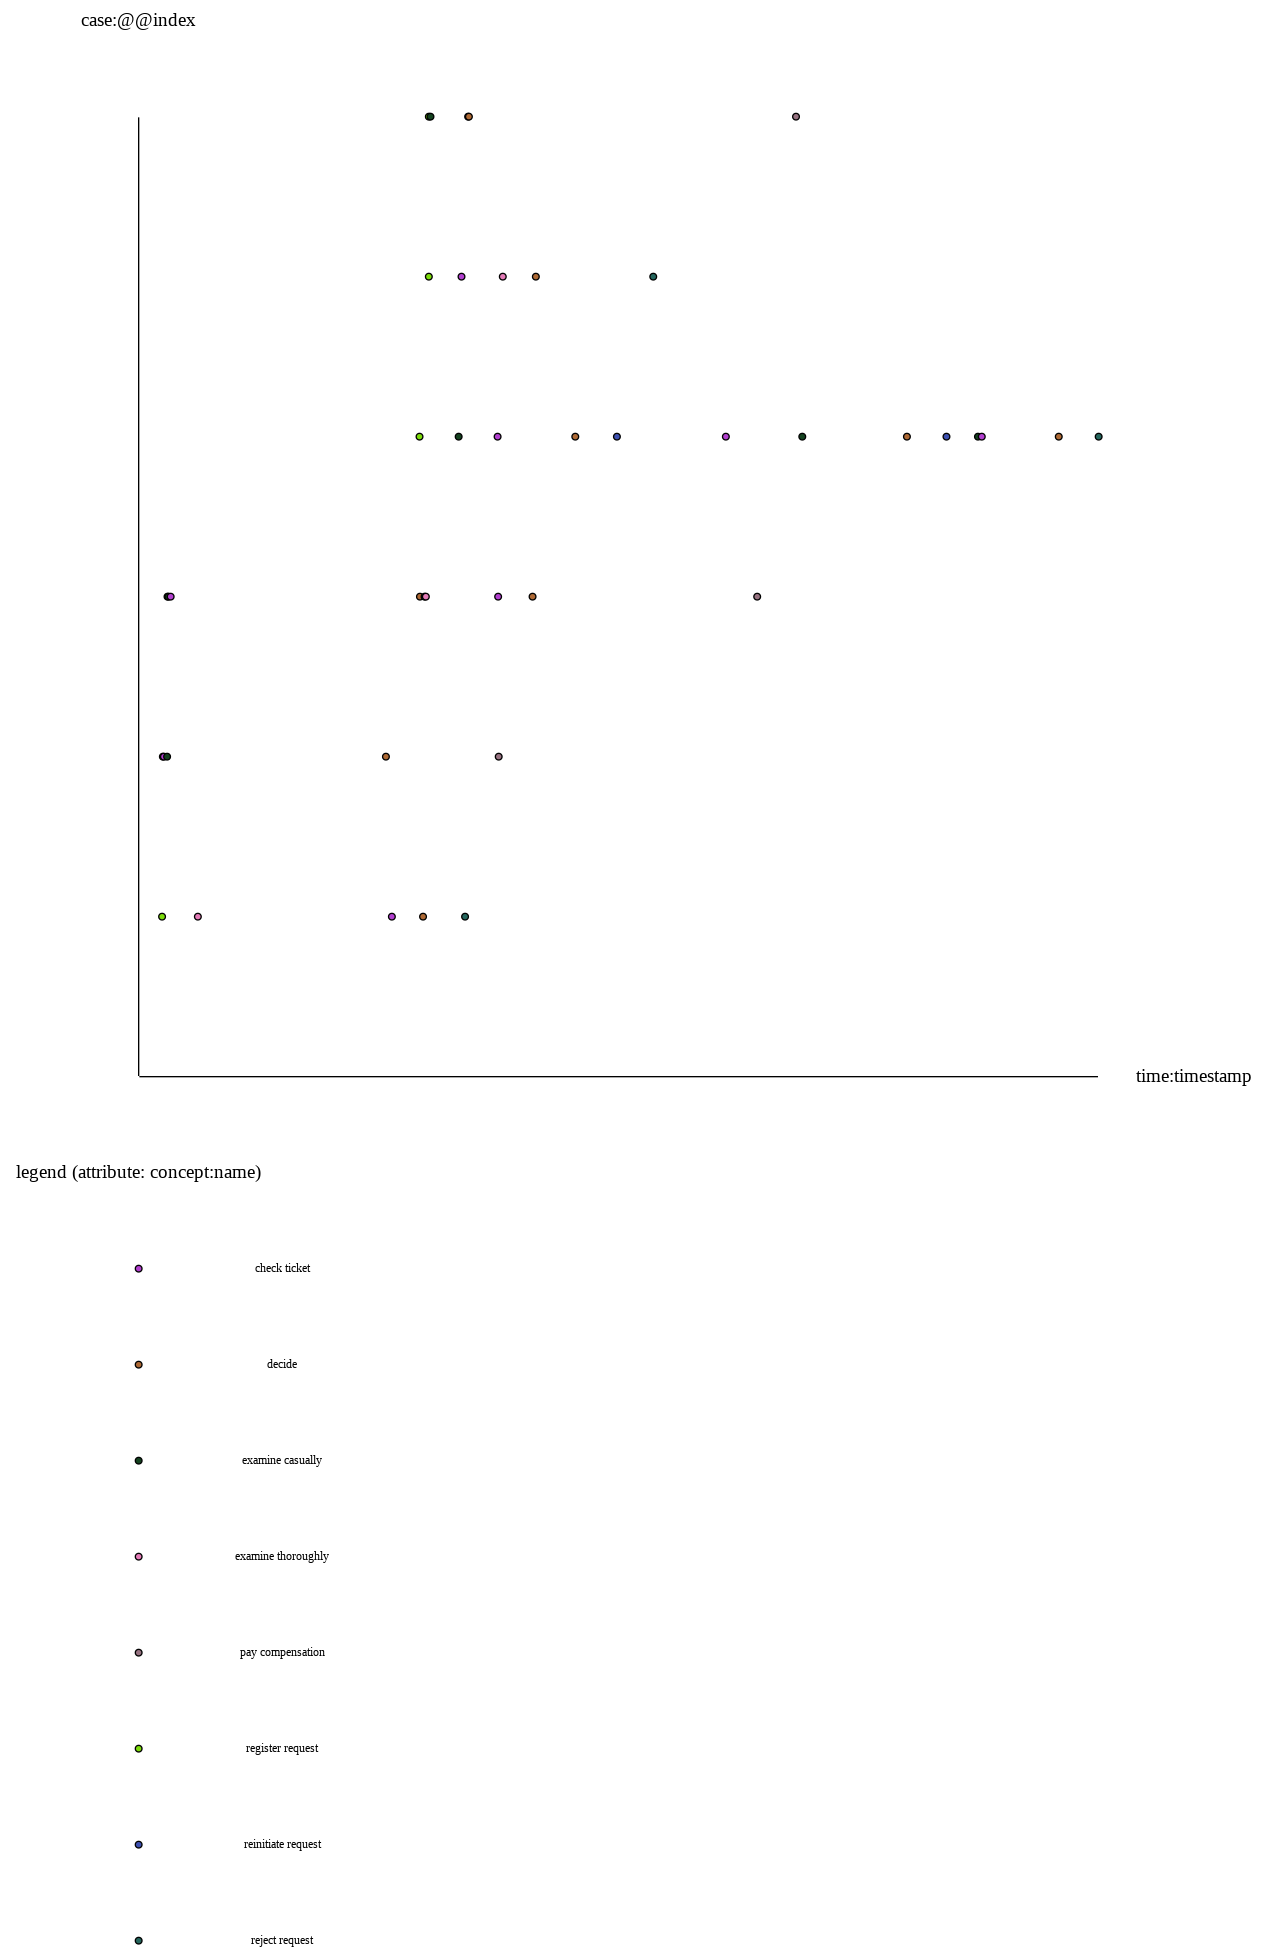

In [51]:
# dotted chart
# 점들로 구성된 chart 
# x : timestamp, y : case id
# 하나의 Row = 하나의 case 
# 전반적인 데이터를 한 눈에 보게 되면서 어느 지점이 문제점이 될지 등을 알 수 있다 

pm4py.view_dotted_chart(event_log_pm4py)

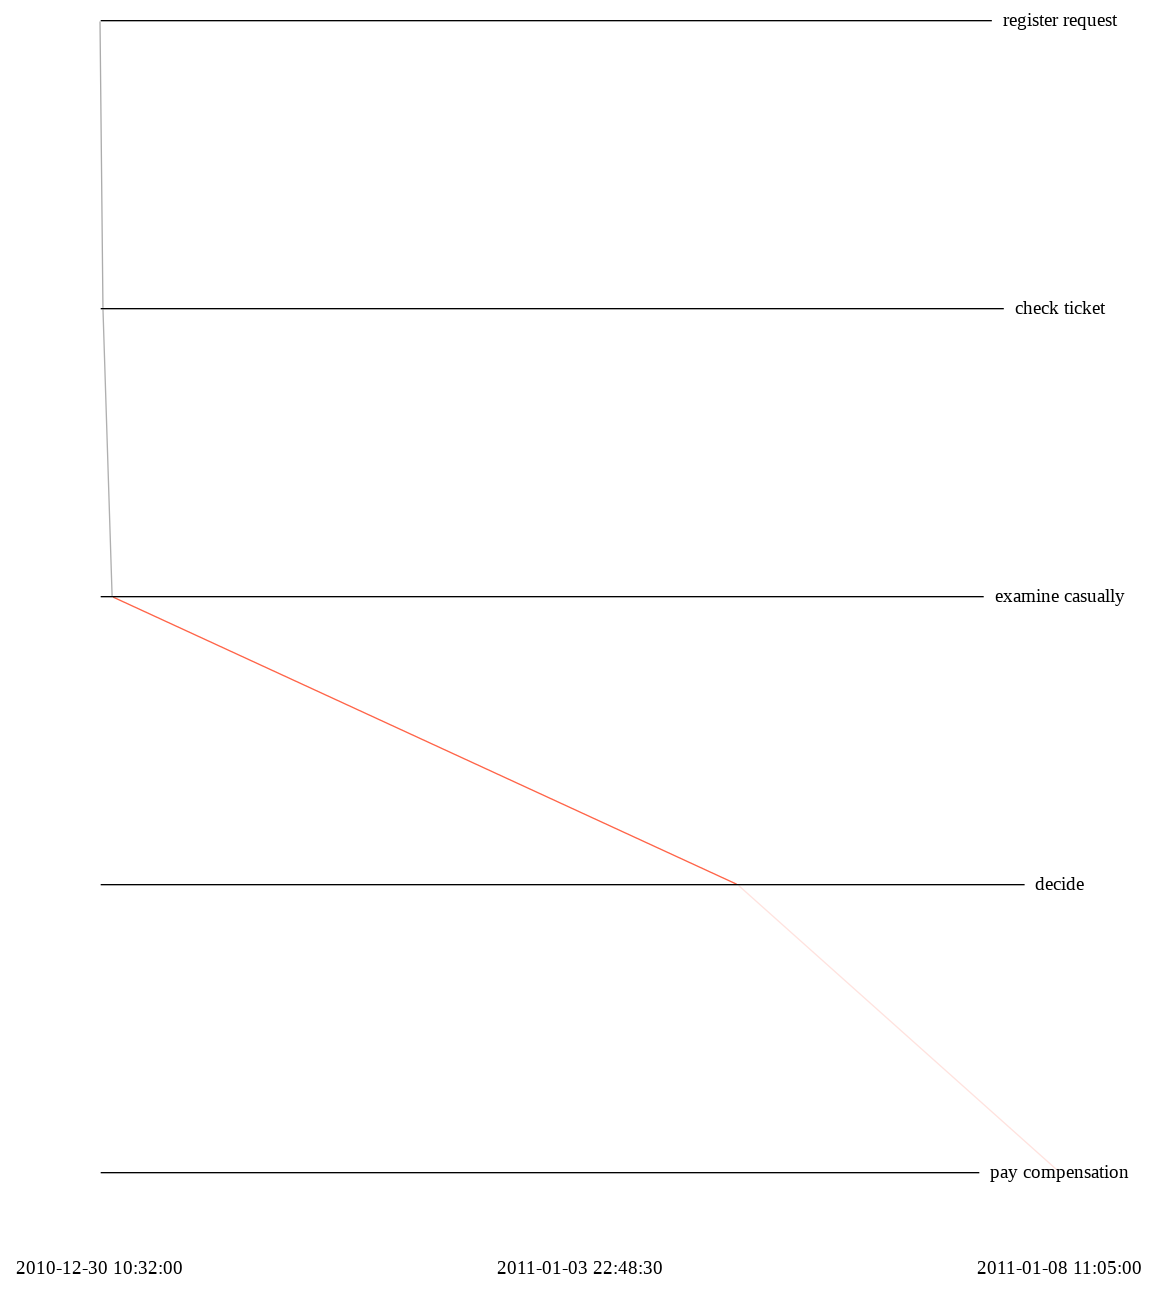

In [53]:
# performance spectrum(['register request', 'check ticket', 'examine casually', 'decide', 'pay compensation'])
# 전반적인 performance는 아니지만, 특정 작업들의 흐름에 관심이 있다면 해당 흐름을 넣고 돌리면 결과값을 얻을 수 있다 
# 작업과 작업 사이의 시간 정보를 알려준다 
# 그래프의 변화가 크다 -> 상당히 긴 작업 시간이 소요 된다 

pm4py.view_performance_spectrum(event_log_pm4py, ['register request', 'check ticket', 'examine casually', 'decide', 'pay compensation'])

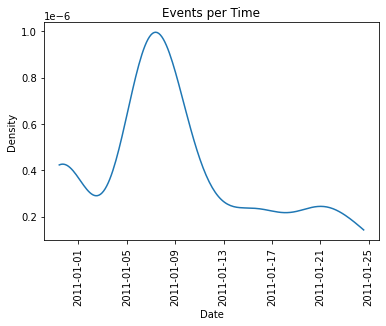

In [54]:
# Events per time
# 작업 분배의 관점에서 특정 시간대에 일이 몰린다면 그 시간대에는 작업자를 늘려줘야 함 
# 시간대별로 모이는 event를 볼 수 있다 

pm4py.view_events_per_time_graph(event_log_pm4py)

## Process Discovery

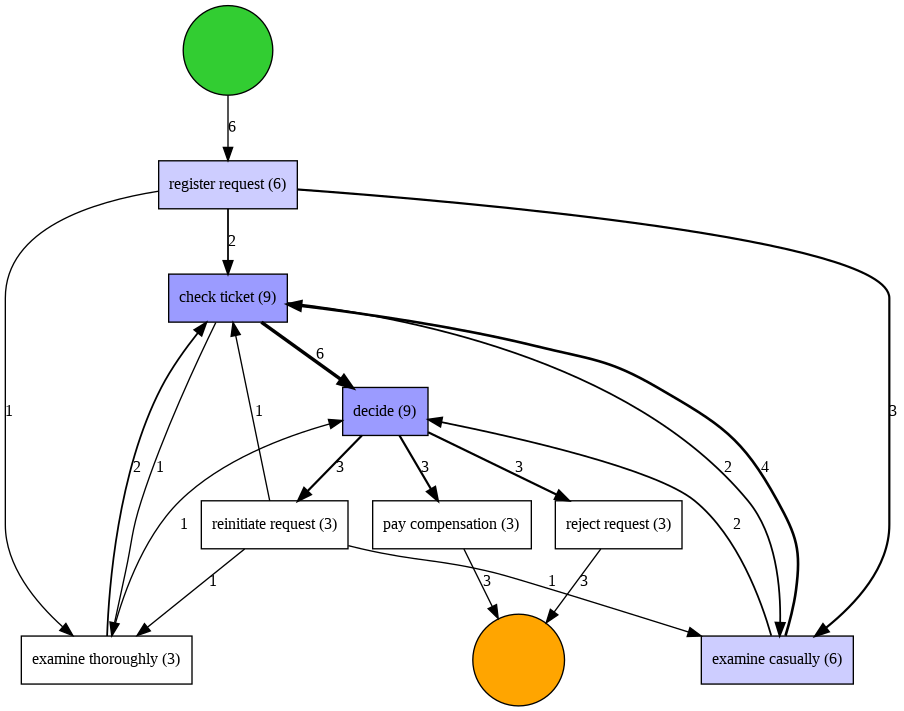

In [75]:
# DFG
# discover_petri_net_alpha : petri-net model로 구현하고 alpha algorithm을 사용한다, 일반적으로 모델 - 알고리즘 순으로 function name 명명 
# discover_dfg : return -> 각각의 direct follows 관계와 빈도수 도출, 제일 시작이 되는 작업 정보와 빈도수, 제일 마지막이 되는 작업 정보와 빈도수 
# view_dfg : direct follows 관계만 바탕으로 model을 도출, 일반적으로 view_model name 을 넣으면 model name으로 볼 수 있음 
# 교수님이랑 graph 값이 다름! -> week 5-1 41:10초

rel, start, final = pm4py.discover_dfg(event_log_pm4py) # relation 
pm4py.view_dfg(rel, start, final)

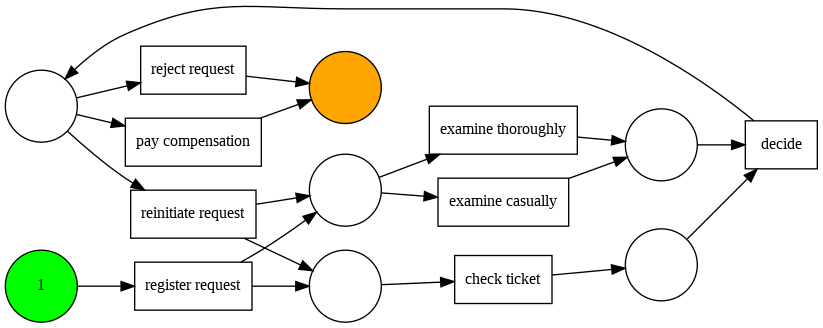

In [72]:
# Alpha mining (Petri-net)
# discover_petri_net_alpha : return -> model의 net, initial marking, final marking(Marking({end: 1}))

net, im, fm = pm4py.discover_petri_net_alpha(event_log_pm4py)
pm4py.view_petri_net(net, im, fm)

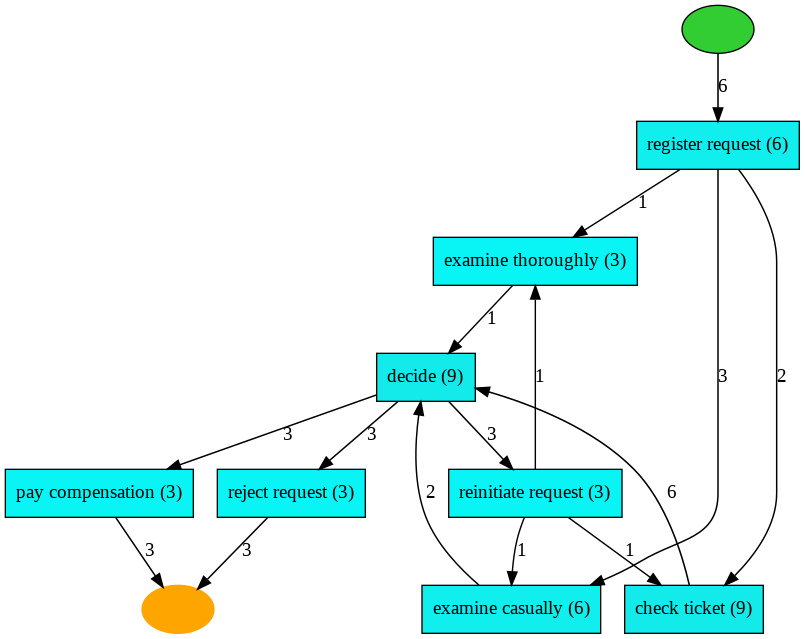

In [76]:
# Heuristic Mining (Heuristic Net)
# discover_heuristic_net : 작업에 대한 net 정보, 작업 이름 다음에 어떤 collection이 있고 collection에 포함된 관련 지표들이 나타남 -> 단순히 heuristic model 형태로 return 
# dfg graph와 비슷해 보이지만 좀 더 직접적인 관계들이 나타나고, dfg는 모든 부분들이 포함되는 복잡한 model이 된다 

heu_model = pm4py.discover_heuristics_net(event_log_pm4py)
pm4py.view_heuristics_net(heu_model)

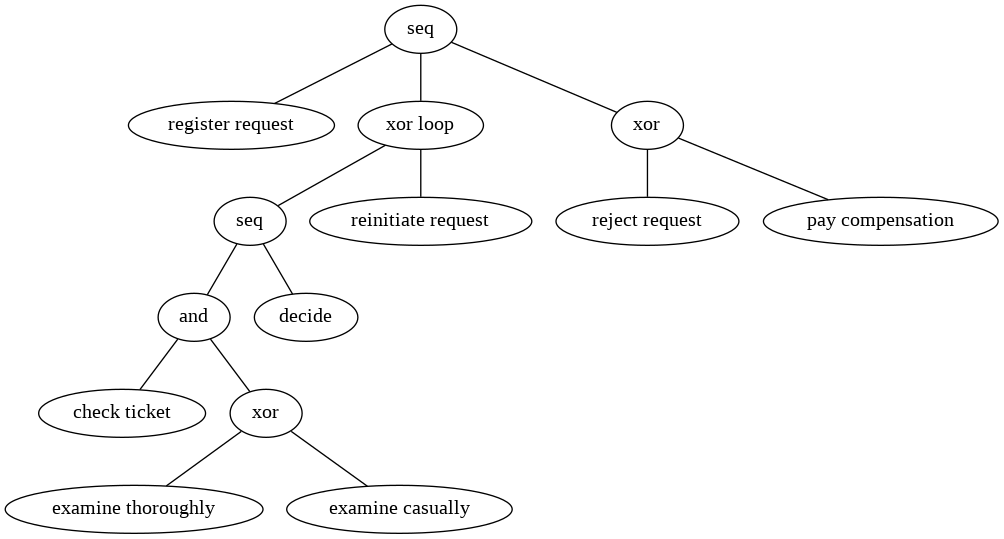

In [77]:
# Inductive Mining (Process tree)
# inductive mining은 기본적으로 process tree를 결과물로 얻을수 있음 
# Tree graph는 작업간의 직접적으로 관계성을 보여주지만 이해하고 전반적인 흐름을 파악하는데에 어려움이 있음 

tree = pm4py.discover_process_tree_inductive(event_log_pm4py)
pm4py.view_process_tree(tree)

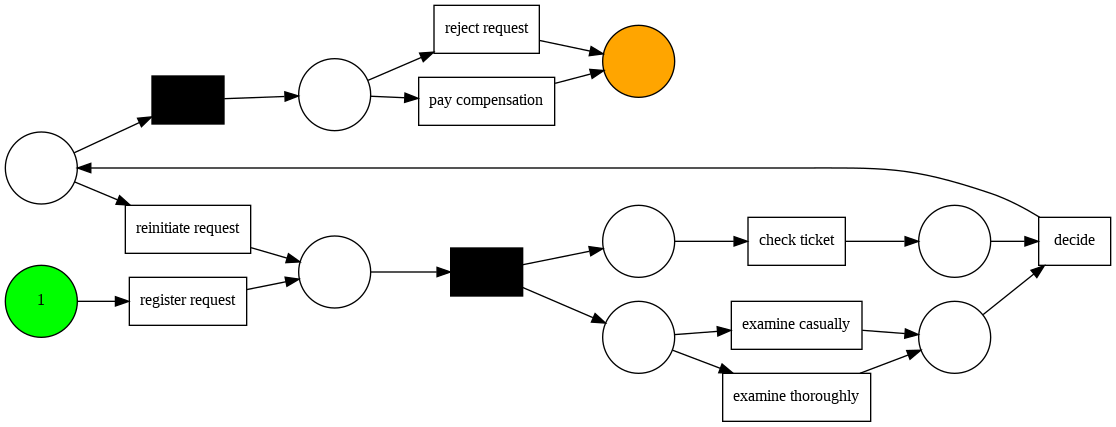

In [79]:
# Process tree to petri-net
# petri net은 3개의 정보, net, initial marking, final marking이 있어야 함 
# black box? -> process tree에서는 표현되지만 petri-net에서는 표현자체가 되지 못하고 사이를 연결하기 위해서 임의의, 가상의 transition을 활용하여 model이 말이 되게끔 표현한 것임 

net2, im2, fm2 = pm4py.convert_to_petri_net(tree)
pm4py.view_petri_net(net2, im2, fm2)

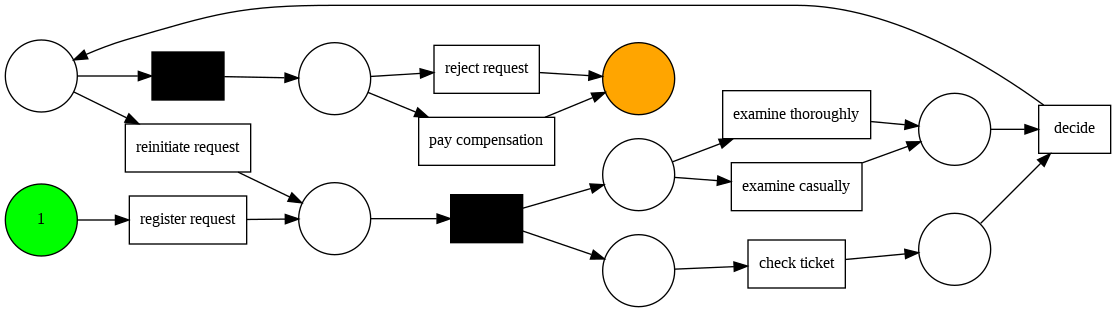

In [80]:
# Inductive mining (Petri-net)
# 위에서 convert 한 겨로가와 동일한 결과물이 나온다 

net3, im3, fm3 = pm4py.discover_petri_net_inductive(event_log_pm4py)
pm4py.view_petri_net(net3, im3, fm3)

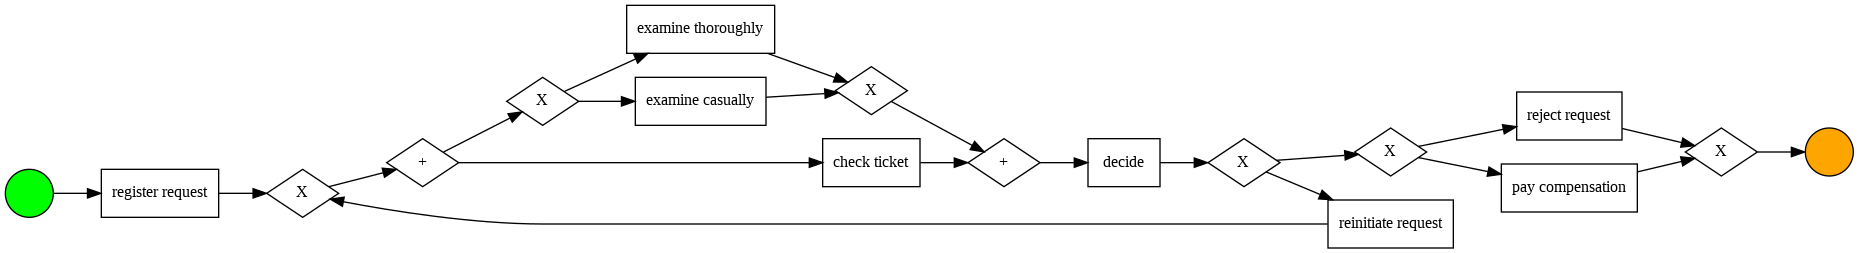

In [81]:
# Inductive mining (BPMN)
# discover_bpmn_inductive : bpmn net
# bpmn 분기의 특성이 보임

bpmn = pm4py.discover_bpmn_inductive(event_log_pm4py)
pm4py.view_bpmn(bpmn)

inductive mining 을 활용했지만 process tree, petri-net, BPMN 으로 표현할 수 있고, 알고리즘은 동일하기 때문에 model의 흐름, 관계성은 전혀 다르지 않고 표현방법만 달라진다! 

alpha mining, inductive mining 결과를 petri-net 으로 표현할 때는 결과가 다를 수 있다! 

그렇기 때문에 도출된 model을 평가하기 위해서는 conformence checking이 중요하다! 